# Описание данных
Данные — небольшой датасет реальных данных, описывающих посещаемость небольшого кружка. Все данные анонимизированы и представлены в виде идентификаторов.


# Уровень 1
Сделайте на основе данных визуализацию.Например, постройте график средней посещаемости по дням, или любые другие графики по вашему усмотрению


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Аналитик — тестовое задание - description.csv to Аналитик — тестовое задание - description (1).csv
Saving Аналитик — тестовое задание - data.csv to Аналитик — тестовое задание - data (1).csv


In [3]:
try:
    description = pd.read_csv('Аналитик — тестовое задание - description.csv', index_col=0)
except:
    description = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/тестовое задание/Аналитик — тестовое задание - description.csv', index_col=0)
description.head()

,Описание
Поле,
event_id,идентификатор урока
event_date,дата урока
customer_id,идентификатор ученика
is_attend,"1 — посетил, 0 — пропустил"
group_ids,идентификатор группы


In [4]:
try:
    data = pd.read_csv('Аналитик — тестовое задание - data.csv', index_col=0)
except:
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/тестовое задание/Аналитик — тестовое задание - data.csv', parse_dates=['event_date'])
data.head(7)

,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
event_id,,,,,,
5,2020-05-22,47,1,2,6,12
15,2020-06-03,354,1,5,4,57
34,2020-06-17,183,1,5,4,158
22,2020-06-11,12,1,1,3,95
36,2020-06-19,260,1,5,4,185
3,2020-05-21,197,1,1,3,5
30,2020-06-18,419,1,3,5,165


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,320.0,281.806250,194.831331,12.0,99.00,258.0,419.00,725.0
is_attend,320.0,0.825000,0.380562,0.0,1.00,1.0,1.00,1.0
group_ids,320.0,3.131250,1.591994,1.0,2.00,3.0,5.00,5.0
teacher_ids,320.0,4.428125,1.094797,3.0,4.00,4.0,5.00,7.0
attendance_id,320.0,166.218750,96.801265,1.0,80.75,170.5,250.25,330.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 5 to 47
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_date     320 non-null    object
 1   customer_id    320 non-null    int64 
 2   is_attend      320 non-null    int64 
 3   group_ids      320 non-null    int64 
 4   teacher_ids    320 non-null    int64 
 5   attendance_id  320 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 17.5+ KB


Выведем гистограммы

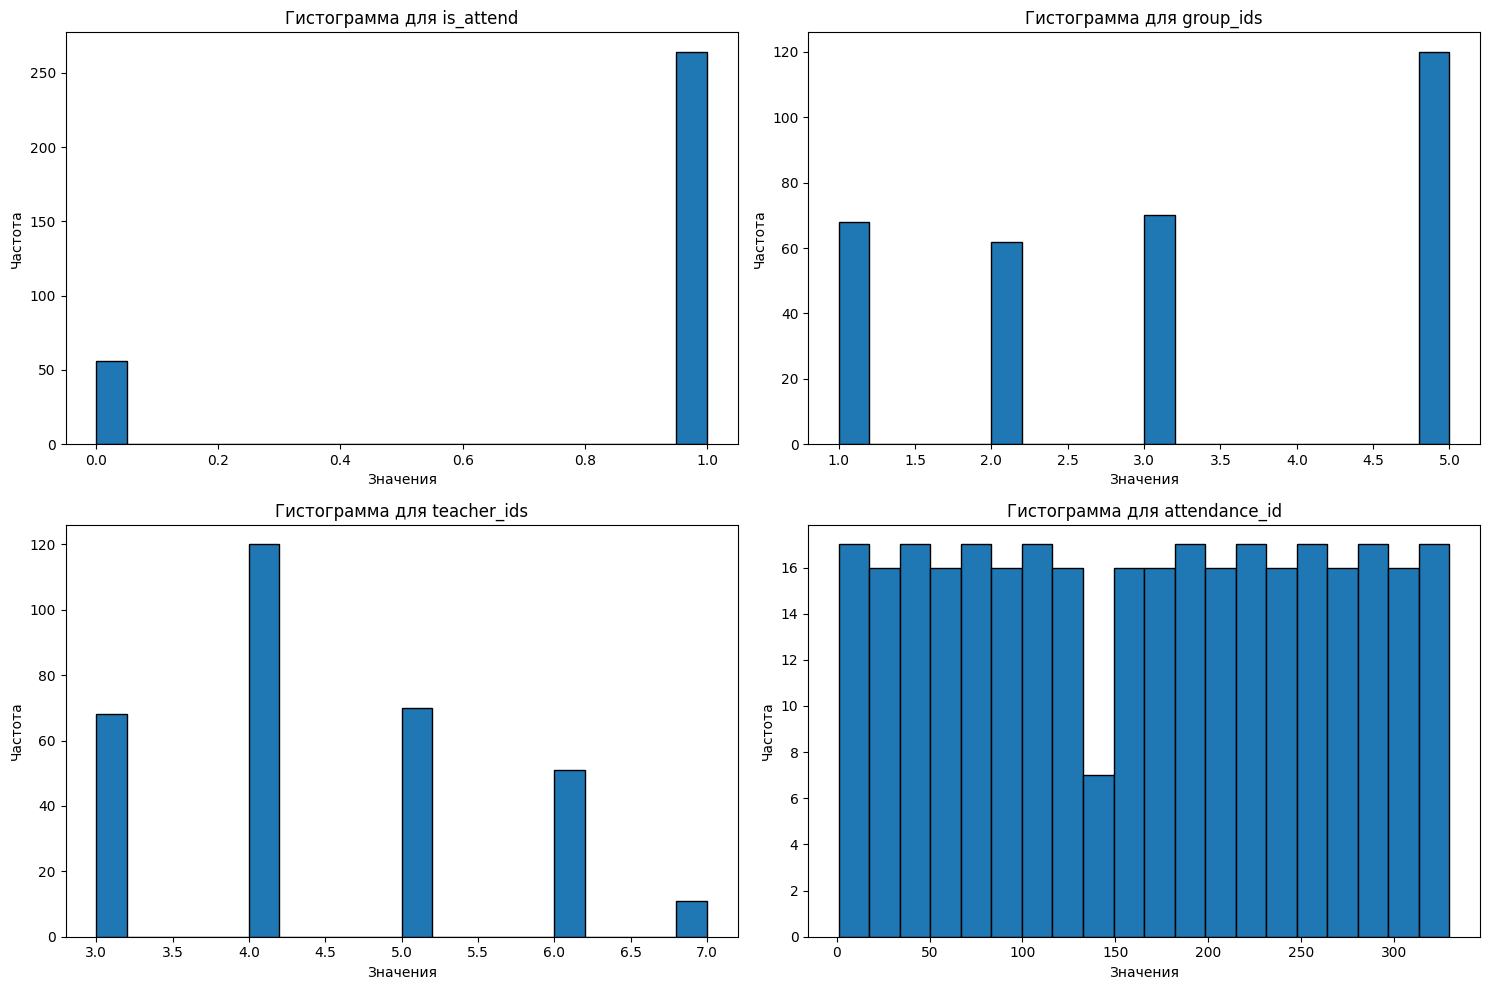

In [7]:
columns_to_plot = [col for col in data.columns if col not in ['event_date', 'customer_id']]
fig = plt.figure(figsize=(15, 10))  # Создаем фигуру

# Итерируемся по столбцам и создаем гистограммы
for i, column_name in enumerate(columns_to_plot):
    if i >= 4: # Если отрисовали достаточно графиков, выходим из цикла
      break
    ax = fig.add_subplot(2, 2, i + 1)  # Создаем subplot

    ax.hist(data[column_name], bins=20, edgecolor='black')
    ax.set_title(f'Гистограмма для {column_name}')
    ax.set_xlabel('Значения')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [8]:
data.head()

,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
event_id,,,,,,
5,2020-05-22,47,1,2,6,12
15,2020-06-03,354,1,5,4,57
34,2020-06-17,183,1,5,4,158
22,2020-06-11,12,1,1,3,95
36,2020-06-19,260,1,5,4,185


In [9]:
description.head(7)

,Описание
Поле,
event_id,идентификатор урока
event_date,дата урока
customer_id,идентификатор ученика
is_attend,"1 — посетил, 0 — пропустил"
group_ids,идентификатор группы
teacher_ids,идентификатор преподавателя
attendance_id,идентификатор строки


Средняя посещаемость по дням. Нам понадобится event_date, is_attend

In [10]:
daily_attendance = data.groupby('event_date')['is_attend'].mean().reset_index()

fig = px.bar(daily_attendance, x='event_date', y='is_attend',
             title='Средняя посещаемость по дням',
             labels={'event_date': 'Дата', 'is_attend': 'Средняя посещаемость'},
             template='plotly_white')
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    title_font_size=16
)
fig.show()

ВИдим что май самый активный месяц по посещаемости

In [11]:
daily_attendance = data.groupby('customer_id')['is_attend'].mean().reset_index()

average_attendance = daily_attendance['is_attend'].mean()

fig = px.line(daily_attendance, x='customer_id', y='is_attend',
             title='Средняя посещаемость учеников',
             labels={'customer_id': 'ID ученика', 'is_attend': 'Средняя посещаемость'},
             template='plotly_white',
             markers=True)

fig.add_trace(go.Scatter(x=daily_attendance['customer_id'],
                         y=[average_attendance] * len(daily_attendance),
                         mode='lines',
                         name='Среднее значение',
                         line=dict(color='red', dash='dash')))  # Красная пунктирная линия


fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    title_font_size=16
)

fig.show()

In [12]:
daily_attendance['attendance_level'] = np.where(daily_attendance['is_attend'] < average_attendance, "low", "high")

print(daily_attendance.head())

   customer_id  is_attend attendance_level
0           12   0.928571             high
1           14   0.666667              low
2           26   0.866667             high
3           30   0.666667              low
4           36   0.000000              low


In [13]:
fig = px.bar(daily_attendance, x='customer_id', y='attendance_level',
             title='уровень посещаемости учеников',
             labels={'customer_id': 'ID ученика', 'attendance_level': 'Уровень посещаемости'},
             template='plotly_white')

fig.show()